# Rétropropagation du gradient

<div style="margin-top: 8rem">
<img src="nn_fish.png" width="200"/>
</div>


*Matthieu Boileau, 10 mars 2021*

## Plan de l'exposé

- Principe de la propagation avant
- Algorithme de la rétropropagation du gradient
- Implémentation d'un réseau perceptron multicouche très simple pour la classification à partir d'un motif géométrique

    - effet du type de motif
    - effet des hyperparamètres
    - effet de l'initialisation des poids


## Réseaux de type perceptron multicouches

Cf. exposé Romane Hélie du 27 janvier 2021.

### Rappel 

Le perceptron multicouches est constitué de couches de neurones où chaque neurone d'une couche est connecté à tous les neurones de la couche suivante.

![image.png](exemple.png)

Dans ce réseau, l'information se propage à sens unique, couche après couche, de la couche d'entrée vers la couche de sortie.

## Un neurone artificiel

Le neurone $j$ de la couche $n$ se schématise de la façon suivante :

<div>
<img src="neurone.png" width="900"/>
</div>

1. Ce neurone agrège les signaux $x_k^{(n - 1)}$ de la couche $n - 1$ :

$$h_j^{(n)} = \sum_k w_{jk}^{(n)} x_k^{(n - 1)}$$

où $w_{jk}^{(n)}$ est le **poids synaptique** appliqué au signal provenant du neurone $k$ de la couche $n - 1$ vers le neurone $j$ de la couche $n$.

2. Le neurone $j$ applique la **fonction d'activation** $g$ (non linéaire) :

$$x_j^{(n)} = g(h_j^{(n)})$$

$x_j^{(n)}$ est le signal de sortie de la couche $n$  qui sera l'entrée pour la couche $n + 1$.

## Algorithme d'apprentissage

L'apprentissage d'un réseau de neurone à propagation avant *(feed-forward)* se fait en répétant une séquence de deux étapes :

1. La propagation avant qui met à jour la sortie
2. La rétropropagation du gradient qui met à jour les poids synaptiques

On considère :

- $\mathbf{x}$ : le vecteur échantillon à l'entrée du réseau,
- $\mathbf{t}$ : le vecteur de sortie recherché pour cet échantillon,
- $\mathbf{y}$ : le vecteur de sortie prédit par le réseau à partir de l'entrée $\mathbf{x}$.

### Propagation vers l'avant 

#### De la couche $n - 1$  à la couche $n$  :  $x_k^{(n - 1)} \mapsto x_j^{(n)}$

Sur chaque couche $n$, en commençant par la première couche cachée, on applique la composition des fonctions d'agrégation et d'activation :

$$x_{j}^{(n)} = g \left( \sum_k w_{jk}^{(n)} x_k^{(n - 1)} \right)$$

#### Sortie du réseau

Sur la dernière couche, on calcule l'erreur $E$ entre la sortie $\mathbf{y}$ et le vecteur cible $\mathbf{t}$.
En fonction du problème, $E$ est typiquement :

- la fonction erreur quadratique pour la régression,
- la fonction d'entropie croisée pour la classification.

### Rétropropagation de l'erreur

Le perceptron multicouche est caractérisé par :

- ses **hyperparamètres :** le nombre de couches, le nombre de neurones par couche, le taux d'apprentissage, la fonction d'activation ; ils sont fixes pendant le processus d'apprentissage.
- ses **paramètres :** les poids synaptiques $w_{jk}^{(n)}$, ajustés par apprentissage.

L'apprentissage consiste à ajuster les poids $w_{jk}^{(n)}$ du réseau pour minimiser l'erreur $E(y, t)$.

On calcule le gradient de l'erreur par rapport aux poids par composition des dérivées :

$$\frac{\partial E}{\partial w_{jk}^{(n)}} = \frac{\partial E}{\partial x_j^{(n)}} \frac{\partial x_j^{(n)}}{\partial w_{jk}^{(n)}} = \frac{\partial E}{\partial x_j^{(n)}} \frac{\partial x_j^{(n)}}{\partial h_j^{(n)}}  \frac{\partial h_j^{(n)}}{\partial w_{jk}^{(n)}}$$

Reste à exprimer les trois termes de ce produit.

Le troisième terme de la composition se calcule facilement :

$$\frac{\partial h_j^{(n)}}{\partial w_{jk}^{(n)}} = \frac{\partial}{\partial w_{jk}^{(n)}} \left( \sum_i w_{ji}^{(n)} x_i^{(n - 1)} \right) = \frac{\partial}{\partial w_{jk}^{(n)}} \left( w_{jk}^{(n)} x_k^{(n - 1)} \right) = x_k^{(n - 1)}$$

Le deuxième terme fait intervenir la dérivée de la fonction d'activation :

$$\frac{\partial x_j^{(n)}}{\partial h_j^{(n)}} = g'(h_j^{(n)})$$

La fonction $g$ doit donc être dérivable.
Un choix classique est la **fonction sigmoïde :**

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

dont la dérivée s'exprime simplement :

$$\sigma'(x) = \sigma(x)(1 - \sigma(x))$$

#### Relation de récurrence

Reste à exprimer le premier terme $\frac{\partial E}{\partial x_j^{(n)}}$ en faisant appel à la couche $n + 1$.

Tous les neurones $l$ de la couche $n + 1$ reçoivent le signal $x_j^{(n)}$ du neurone $j$ de la couche $n$.
On peut donc exprimer le premier terme à partir des dérivées partielles des signaux agrégés $h_l^{(n+1)}$ :

$$\frac{\partial E}{\partial x_j^{(n)}} = \sum_l \left( \frac{\partial E}{\partial h_l^{(n+1)}} \frac{\partial h_l^{(n+1)}}{\partial x_j^{(n)}} \right) = \sum_l \left( \frac{\partial E}{\partial x_l^{(n+1)}} \frac{\partial x_l^{(n+1)}}{\partial h_l^{(n+1)}} \frac{\partial h_l^{(n+1)}}{\partial x_j^{(n)}} \right) = \sum_l \left( \frac{\partial E}{\partial x_l^{(n+1)}} g'(h_l^{(n + 1)}) w_{lj}^{(n+1)} \right)$$

En posant :

$$\delta_j^{(n)} = \frac{\partial E}{\partial x_j^{(n)}} g'(h_j^{(n)})$$

On obtient la relation de récurrence suivante :

$$\delta_j^{(n)} = g'(h_j^{(n)}) \sum_l \left( \delta_l^{(n + 1)} w_{lj}^{(n+1)} \right)$$

Ce qui permet de calculer notre gradient au moyen d'une suite récurrente :

$$\frac{\partial E}{\partial w_{jk}^{(n)}} = x_k^{(n - 1)} \delta_j^{(n)}$$

#### La couche de sortie : le premier terme d'une suite récurrente

Le premier terme de la suite définie par la relation de récurrence est $\delta_j^{(L)}$ où $L$ est la couche de sortie :

$$\delta_j^{(L)} = \frac{\partial E}{\partial y_j} g'\left(h_j^{(L)}\right)$$

Le terme $\frac{\partial E}{\partial y}$ dépend du choix de la fonction erreur.
Dans le cas de la fonction erreur quadratique :

$$ E = \frac {1}{2} \lVert \mathbf{y} - \mathbf{t}\rVert ^{2}$$

où $t_i$  est la valeur de sortie attendue correspondant à l'entrée $x_i$.

$$\frac{\partial E}{\partial y_j} = \frac{\partial}{\partial y_j}\left(\frac{1}{2} \lVert \mathbf{y} - \mathbf{t} \rVert^2 \right) = y_{j} - t_{j}$$

d'où 

$$\delta_j^{(L)} = g'\left(h_j^{(L)}\right) \left(y_{j} - t_{j} \right)$$


#### Mise à jour des poids par rétropropagation

On commence par appliquer la correction suivante sur les poids de la couche de sortie $L$ :

$$\Delta w_{jk}^{(L)} = -\lambda \frac {\partial E}{\partial w_{jk}^{(L)}} = -\lambda x_k^{(L - 1)} \frac{\partial E}{\partial y_j} g'\left(h_j^{(L)}\right)$$

où le paramètre $\lambda \in [0, 1]$ est le taux d'apprentissage.

Connaissant $\delta_j^{(L - 1)}$ par la relation de récurrence, on calcule $\Delta w_{jk}^{(L - 1)}$, puis on remonte, couche par couche en direction de l'entrée du réseau, en appliquant la correction suivante sur les poids de la couche $n$ :

$$\Delta w_{jk}^{(n)} = -\lambda \frac {\partial E}{\partial w_{jk}^{(n)}} = -\lambda x_k^{(n - 1)} \delta_j^{(n)}$$




#### Résumé de l'algorithme

1. On initialise les poids avec des valeurs aléatoires
1. On boucle sur les étapes suivantes :

    1. On réalise le calcul vers l'avant pour l'ensemble des $N$ échantillons
    1. On calcule la fonction erreur
    1. On calcule les gradients pour chaque poids par rétropropagation depuis la couche de sortie
    1. On met à jour les poids

1. On s'arrête lorsque l'erreur est acceptable.

## Exemple de classification binaire

Problème : prévoir la valeur d'une variable qualitative binaire à partir de données classées suivant un motif 2D.

- Données : un échantillon de $N$ points générés aléatoirement $(x_i) \in ([-1, 1] \times [-1, 1])^N$
- Classe binaire : $(t_i) \in \{0, 1\}$

Afin d'illustrer le principe de la rétropropagation, on va résoudre ce problème en programmant un perceptron très simple en python-numpy.

*Exemple inspiré de <https://www.coursera.org/learn/deep-learning-reinforcement-learning>*

### Génération des données

On définit une classe Python qui génère des points aléatoirement sur $[-1, 1] \times [-1, 1]$ et les classe par rapport à un motif (ici un carré incliné).

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class Diamond:
    
    def __init__(self, n_obs=500):
        self.n_obs = n_obs
        x_0 = np.random.uniform(-1, 1, size=(n_obs, 2))
        x_bias = np.ones((n_obs, 1))  # a trick to use a weight component as a bias
        self.x = np.concatenate((x_0, x_bias), axis=1)
        self.t = self.get_target()
        
    def get_target(self):
        return ((np.abs(self.x[:, 0]) + np.abs(self.x[:, 1])) < 1).astype(int)

    def plot_boundary(self, ax):
        ax.plot([-1, 0, 1, 0, -1], [0, 1, 0, -1, 0], 'grey', linestyle='solid')
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.plot(self.x[self.t==1, 0], self.x[self.t==1, 1], 'o', label='classe 1')
        ax.plot(self.x[self.t==0, 0], self.x[self.t==0, 1], 'o', mfc='none', label='classe 0')
        self.plot_boundary(ax)
 
        ax.legend() 
        ax.axis('equal');

On instancie la classe et on trace les points.

In [3]:
d = Diamond()
d.plot()

À partir de cet échantillon, on va demander au réseau de prévoir la classe de n'importe quel point de ce domaine.

## Définition du réseau

On définit un réseau de type perceptron à deux couches (la couche d'entrée n'est pas comptée) :

- une couche cachée
- une couche de sortie

<div style="margin-top:5rem">
<img src="reseau.png" width="900"/>
</div>

### Fonctions d'activation

On définit trois sortes de fonctions d'activation $g$.

In [4]:
class Sigmoid:
    
    @staticmethod
    def function(x):
        return 1 / (1 + np.exp(-x))

    def derivative(self, x):
        return self.function(x)*(1 - self.function(x))
    
    def plot(self, ax=None):
        x = np.linspace(-5, 5, 100)
        if ax is None:
            fig, ax = plt.subplots(figsize=(5, 3))
        ax.plot(x, self.function(x), label='$g$')
        ax.plot(x, self.derivative(x), linestyle='dashed', label="$g'$")
        ax.set_xlabel('$x$')
        ax.set_title(self.__class__.__name__)
        ax.legend()

In [5]:
class ReLU(Sigmoid):
    
    @staticmethod
    def function(x):
        return np.maximum(x, 0)

    def derivative(self, x):
        return np.heaviside(x, 0)

In [6]:
class Tanh(Sigmoid):
    
    @staticmethod
    def function(x):
        return np.tanh(x)

    def derivative(self, x):
        return 1 - self.function(x)*self.function(x)

On trace leurs valeurs ainsi que leurs dérivées respectives.

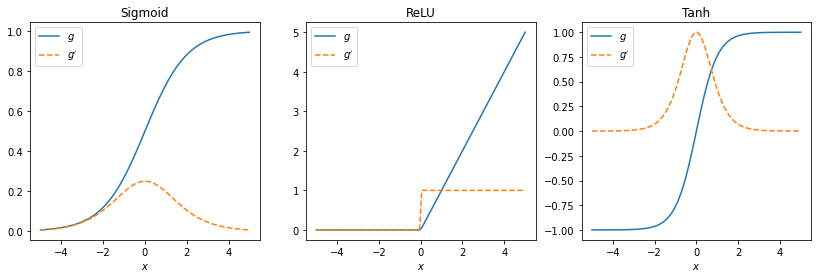

In [7]:
fig, axs = plt.subplots(ncols=3, figsize=(14, 4))
Sigmoid().plot(axs[0])
ReLU().plot(axs[1])
Tanh().plot(axs[2])

### Fonction erreur (ou fonction coût)

Comme on l'a vu, le choix de la fonction erreur influence directement le calcul du gradient et donc l'apprentissage.
Pour les problèmes de classification, la fonction d'entropie croisée (*cross-entropy* ou *logistic loss* en anglais) est classique :


$$E(\mathbf{y}, \mathbf{t}) = - \frac{1}{N} \sum_{i=1}^N \left(t_i \ln (y_i) + (1 - t_i) \ln (1 - y_i) \right)$$

In [8]:
def log_loss(t, y, eps=1e-16):
    y = np.maximum(y, eps)
    y = np.minimum(y, 1 - eps)
    return - (np.sum(t * np.log(y)) + np.sum((1 - t) * np.log(1 - y))) / t.size

Pour comprendre l'intérêt de cette fonction pour la classification... on la trace.

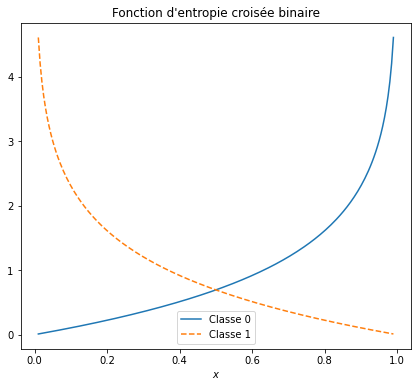

In [9]:
def binary_log_loss(t, y):
    return - (t * np.log(y) + (1 - t) * np.log(1 - y))

fig, ax = plt.subplots(figsize=(7, 6))
x = np.linspace(0.01, 0.99, 200)
ax.plot(x, binary_log_loss(0, x), label='Classe 0')
ax.plot(x, binary_log_loss(1, x), label='Classe 1', linestyle='dashed')
ax.set_title("Fonction d'entropie croisée binaire")
ax.set_xlabel("$x$")
ax.legend();

### Une classe réseau

L'initialiseur de la classe `Network` définit les données d'entrée, la cible et les hyper-paramètres :

- la fonction d'activation
- le taux d'apprentissage

Il initialise les poids de façon aléatoire.

In [10]:
class Network:
    
    def __init__(self, pattern, Activation=Sigmoid, learning_rate=0.001, seed=1241):

        self.pattern = pattern
        self.x = self.pattern.x  # input
        self.t = self.pattern.t  # output target
        self.g = Activation()
        self.learning_rate = learning_rate
        self.n_obs = self.x.shape[0]
        
        # Initialize weights with uniform random values in [-1, 1]
        np.random.seed(seed)
        self.w1 = np.random.uniform(-1, 1, size=(3, 4))
        self.w2 = np.random.uniform(-1, 1, size=(4, ))

        self.pred_subplot = None

    def __repr__(self):
        return f"""\
Training on {self.n_obs} observations:
  Activation function: {self.g.__class__.__name__}
  learning_rate = {self.learning_rate}
"""    

On implémente ensuite la boucle d'entraînement et les fonctions de tracé.

#### L'étape de *feed-forward* 

**Première couche :**

$$x_{j}^{(1)} = g \left( \sum_k w_{jk}^{(1)} x_k^{(0)} \right)$$

Les poids $w_{jk}^{(1)}$ sont stockés dans une matrice $4 \times 3$.

**Deuxième couche :**

$$y = x^{(2)} = g \left( \sum_k w_{k}^{(2)} x_k^{(1)} \right)$$

Les poids $w_{k}^{(2)}$ de l'unique neurone de sortie sont représentés par un vecteur de taille $4$.


#### L'étape de  rétropropagation

Pour commencer la rétropropagation, on doit calculer l'erreur du neurone de sortie :

$$\delta^{(2)} = \frac{\partial E}{\partial y} g'\left(h^{(2)}\right)$$

Dans le cas particulier d'une fonction erreur de type entropie croisée, le premier terme s'écrit :

$$\frac{\partial E}{\partial y} = \frac{y - t}{y (1 - y)}$$

Par ailleurs, la fonction $g$ étant une sigmoïde, on a :

$$g'\left(h^{(2)}\right) = g \left(h^{(2)} \right) \left(1 - g \left(h^{(2)}\right) \right) = y (1 - y)$$

d'où $$\delta^{(2)} = y - t$$

On calcule alors :

$$\frac{\partial E}{\partial w_k^{(2)}} = x_k^{(1)} \delta_j^{(2)}$$

Puis on s'intéresse à la première couche :

$$\delta_j^{(1)} = g'(h_j^{(1)}) \delta^{(2)} w_{j}^{(2)}$$

Ce qui permet d'exprimer le gradient :

$$\frac{\partial E}{\partial w_{jk}^{(1)}} = x_k^{(0)} \delta_j^{(1)}$$


$\frac{\partial E}{\partial w_{jk}^{(1)}}$ et $\frac{\partial E}{\partial w_k^{(2)}}$ vont permettre de mettre à jour respectivement les $w_{jk}^{(1)}$ et $w_k^{(2)}$.

L'implémentation avec Numpy est assez simple.
On utilise les opérations d'algèbre linéaire pour propager la matrice des $N$ exemples d'entrée. 

In [11]:
def forward_backward(self):
    """Return the new prediction y and gradients"""

    # Forward propagation
    h1 = self.x @ self.w1
    x1 = self.g.function(h1)
    h2 = x1 @ self.w2
    y = self.g.function(h2)

    # Backward propagation
    delta2 = y - self.t  # only valid when log loss and Sigmoid are used!
    dE_dw2 = delta2 @ x1
    dh1_dx1 = self.g.derivative(h1)
    delta1 = ((delta2.reshape(-1, 1) @ self.w2.reshape(-1, 1).T) * dh1_dx1).T
    dE_dw1 = (delta1 @ self.x).T
    
    return y, dE_dw1, dE_dw2

#### Boucle d'entraînement

On exécute l'algorithme de rétropropagation sur $n_{iter}$ itérations et on stocke la valeur de l'erreur et de la précision.
La précision est définie comme le quotient du nombre de prédictions justes sur le nombre total de prédictions.

In [12]:
def train(self, n_iter=5000, verbose=True, animate=False, n_iter_out=200):

    # Define new quantities for output
    self.losses = np.empty((n_iter, ), dtype=float)
    self.accuracies = np.empty_like(self.losses)
    self.w1s = np.empty((n_iter, 3 * 4), dtype=float)
    self.w2s = np.empty((n_iter, 4), dtype=float)

    if verbose:
        print(self)

    subplot = None
    for i in range(n_iter):

        self.y, dE_dw1, dE_dw2 = self.forward_backward()

        # Update the weight matrices
        self.w1 -= self.learning_rate * dE_dw1
        self.w2 -= self.learning_rate * dE_dw2

        # Store the weights for output
        self.w1s[i] = self.w1.reshape(3 * 4)
        self.w2s[i] = self.w2

        # Compute the loss and accuracy
        loss = log_loss(self.t, self.y)
        accuracy = np.sum((self.y >= 0.5) == self.t) / self.n_obs

        if (i + 1) % n_iter_out == 0:
            if verbose:
                print(
                    f'ite {i:5d}, loss = {loss:.4f}, accuracy = {accuracy}'
                )
            if animate:
                self.plot_predictions(title=f"ite = {i + 1}")

        self.losses[i] = loss
        self.accuracies[i] = accuracy

    print(f'ite {i:5d}, loss = {loss:.4f}, accuracy = {accuracy}')
    if animate:
        plt.show()  

On définit enfin des fonctions de tracé :

In [13]:
def plot_loss_accuracy(self):

    fig = plt.figure(figsize=(14, 6))
    fig.suptitle("Erreur et précision en fonction de l'itération")

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(self.losses)
    ax.grid(True)
    ax.set(xlabel='itérations', title='Fonction erreur')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(self.accuracies)
    ax.grid(True)
    ax.set(xlabel='itérations', title='Précision')

def plot_weights(self):

    fig = plt.figure(figsize=(14, 6))
    fig.suptitle("Poids en fonction de l'itération")

    labels = ["$w^1_{{{0}{1}}}$".format(i + 1, j + 1)
              for (i, j), _ in np.ndenumerate(self.w1)]
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(self.w1s)
    ax.grid(True)
    ax.set(xlabel='itérations', title='$w_1$')
    ax.legend(labels)

    labels = [f"$w^2_{i + 1}$" for (i, ) , _ in np.ndenumerate(self.w2)]
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(self.w2s)
    ax.grid(True)
    ax.set(xlabel='itérations', title='$w_2$')
    ax.legend(labels)

def plot_predictions(self, title=None):

    pred1 = (self.y >= 0.5)
    pred0 = (self.y < 0.5)

    if self.pred_subplot is None:
        self.pred_subplot = plt.subplots(figsize=(8, 8))

    fig, ax = self.pred_subplot
    ax.clear()

    if title:
        ax.set_title(title)

    # True predictions
    ax.plot(self.x[pred1 & (self.t == 1), 0],
            self.x[pred1 & (self.t == 1), 1],
            'o', label='Vrais positifs')
    ax.plot(self.x[pred0 & (self.t == 0), 0],
            self.x[pred0 & (self.t == 0), 1],
            'o', mfc='none', label='Vrais négatifs')
    self.pattern.plot_boundary(ax)

    # False predictions
    ax.plot(self.x[pred1 & (self.t == 0), 0],
            self.x[pred1 & (self.t == 0), 1],
            '+', label='Faux positifs', markersize=15)
    ax.plot(self.x[pred0 & (self.t == 1), 0],
            self.x[pred0 & (self.t == 1), 1],
            '+', mfc='none', label='Faux négatifs', markersize=15)

    ax.legend(loc='upper right')
    ax.axis('equal')

    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.pause(0.01)

On affecte les fonctions à la classe `Network`.

In [14]:
Network.forward_backward = forward_backward
Network.train = train
Network.plot_loss_accuracy = plot_loss_accuracy
Network.plot_predictions = plot_predictions
Network.plot_weights = plot_weights

### Un premier calcul

Training on 500 observations:
  Activation function: Sigmoid
  learning_rate = 0.001

ite   199, loss = 0.6877, accuracy = 0.49
ite   399, loss = 0.6752, accuracy = 0.586
ite   599, loss = 0.6228, accuracy = 0.75
ite   799, loss = 0.5488, accuracy = 0.754
ite   999, loss = 0.5159, accuracy = 0.758
ite  1199, loss = 0.4834, accuracy = 0.772
ite  1399, loss = 0.4090, accuracy = 0.828
ite  1599, loss = 0.3492, accuracy = 0.88
ite  1799, loss = 0.3102, accuracy = 0.89
ite  1999, loss = 0.2761, accuracy = 0.902
ite  2199, loss = 0.2460, accuracy = 0.914
ite  2399, loss = 0.2234, accuracy = 0.922
ite  2599, loss = 0.2074, accuracy = 0.948
ite  2799, loss = 0.1960, accuracy = 0.956
ite  2999, loss = 0.1874, accuracy = 0.962
ite  3199, loss = 0.1807, accuracy = 0.966
ite  3399, loss = 0.1752, accuracy = 0.968
ite  3599, loss = 0.1706, accuracy = 0.97
ite  3799, loss = 0.1667, accuracy = 0.968
ite  3999, loss = 0.1632, accuracy = 0.97
ite  4199, loss = 0.1601, accuracy = 0.968
ite  4399, loss =

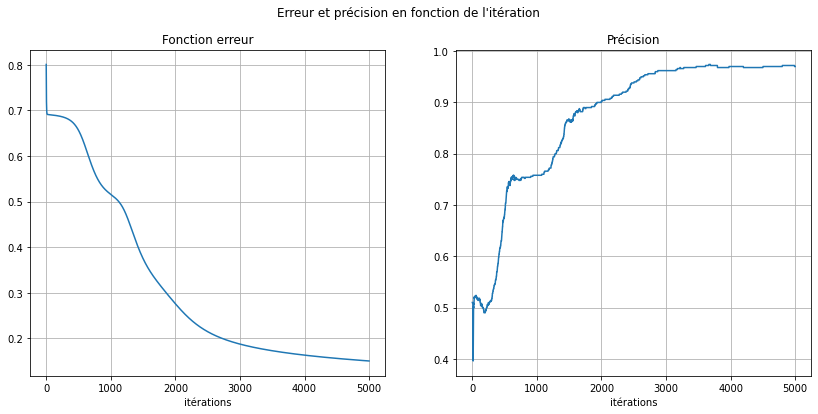

In [15]:
pattern = Diamond(n_obs=500)
net1 = Network(pattern)
net1.train(n_iter=5000)
net1.plot_loss_accuracy()

On trace les prédictions :

In [16]:
net1.plot_predictions()

On trace l'évolution des poids au cours de l'entraînement :

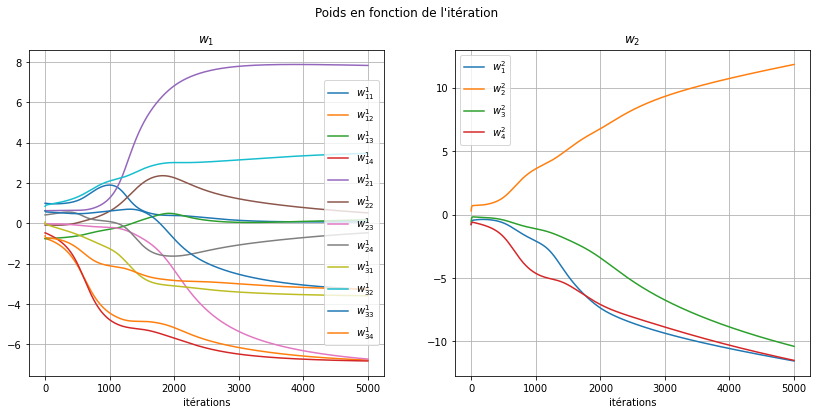

In [17]:
net1.plot_weights()

On relance le même calcul pour animer les prédictions au cours de l'entraînement

<IPython.core.display.Javascript object>


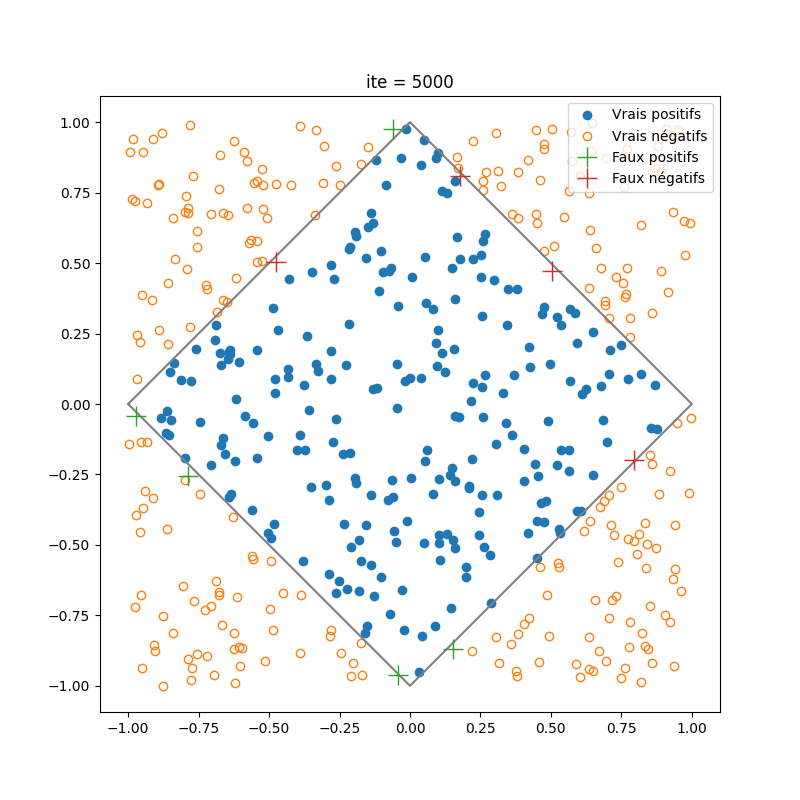

ite  4999, loss = 0.1453, accuracy = 0.982


In [18]:
%matplotlib notebook
pattern = Diamond(n_obs=500)
net1 = Network(pattern)
net1.train(n_iter=5000, animate=True, verbose=False, n_iter_out=25)

Et pour les mêmes paramètres, une vue animée complète de l'entraînement :

![Animation de l'entraînement](training.gif)

### Effet du motif

In [19]:
class Square(Diamond):
    
    def get_target(self):
        return ((np.maximum(np.abs(self.x[:, 0]), np.abs(self.x[:, 1]))) < 0.5).astype(int)
    
    def plot_boundary(self, ax):
        ax.plot([-0.5, 0.5, 0.5, -0.5, -0.5], [0.5, 0.5, -0.5, -0.5, 0.5],
                       'grey', linestyle='solid')

ite  4999, loss = 0.1348, accuracy = 0.944


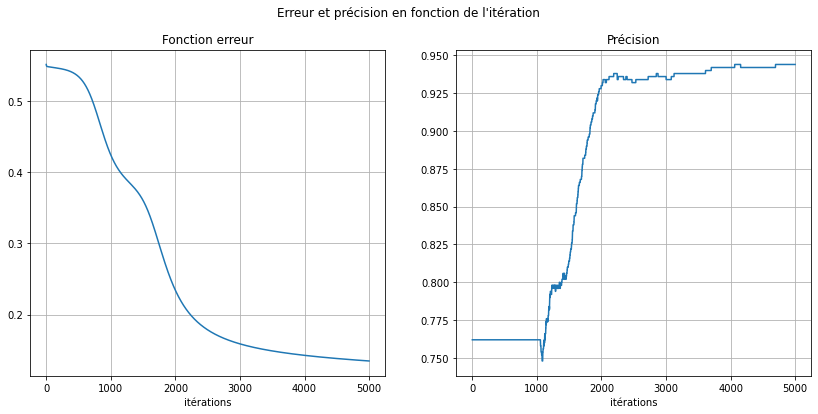

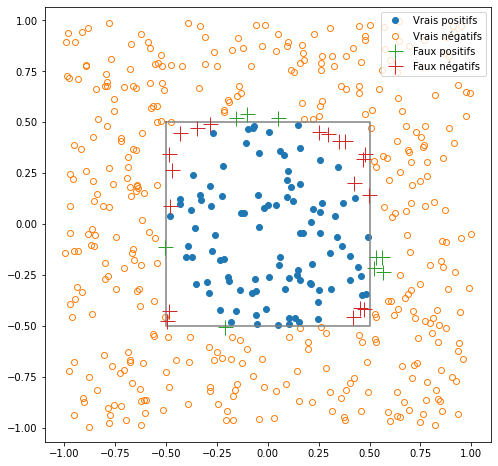

In [20]:
%matplotlib inline
snet = Network(Square(n_obs=500))
snet.train(n_iter=5000, verbose=False)
snet.plot_loss_accuracy()
snet.plot_predictions()

In [21]:
class Circle(Diamond):
    
    def get_target(self):
        return (np.sqrt(self.x[:, 0]**2 + self.x[:, 1]**2) < 0.75).astype(int)
    
    def plot_boundary(self, ax):
        circle = plt.Circle((0, 0), 0.75, color='grey', fill=False)
        ax.add_patch(circle)

ite  4999, loss = 0.1480, accuracy = 0.958


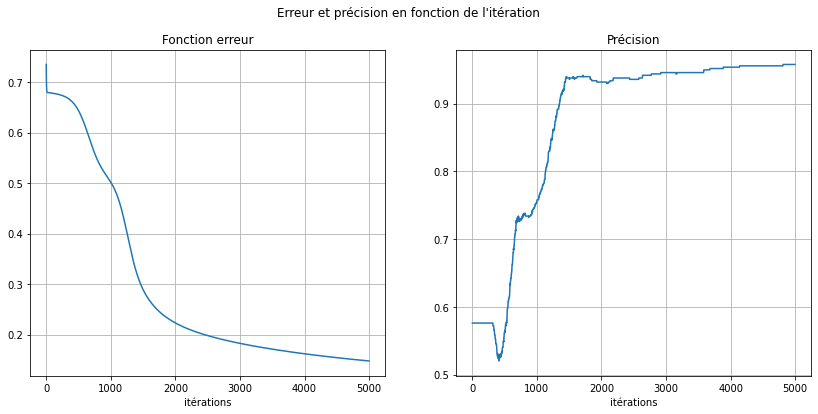

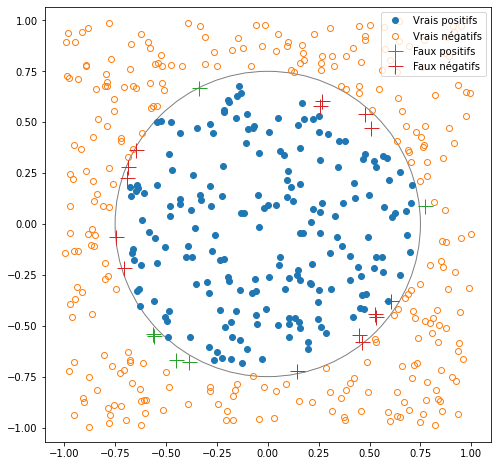

In [22]:
cnet = Network(Circle(n_obs=500))
cnet.train(n_iter=5000, verbose=False)
cnet.plot_loss_accuracy()
cnet.plot_predictions()

### Effet du taux d'apprentissage

On calcule trois valeurs successives

In [23]:
print(net1)

pattern = Diamond(n_obs=500)
net2 = Network(pattern, learning_rate=0.01)
print(net2)
net2.train(n_iter=5000, verbose=False)

net3 = Network(pattern, learning_rate=0.0005)
print(net3)
net3.train(n_iter=5000, verbose=False)

Training on 500 observations:
  Activation function: Sigmoid
  learning_rate = 0.001

Training on 500 observations:
  Activation function: Sigmoid
  learning_rate = 0.01

ite  4999, loss = 0.1464, accuracy = 0.936
Training on 500 observations:
  Activation function: Sigmoid
  learning_rate = 0.0005

ite  4999, loss = 0.2292, accuracy = 0.942


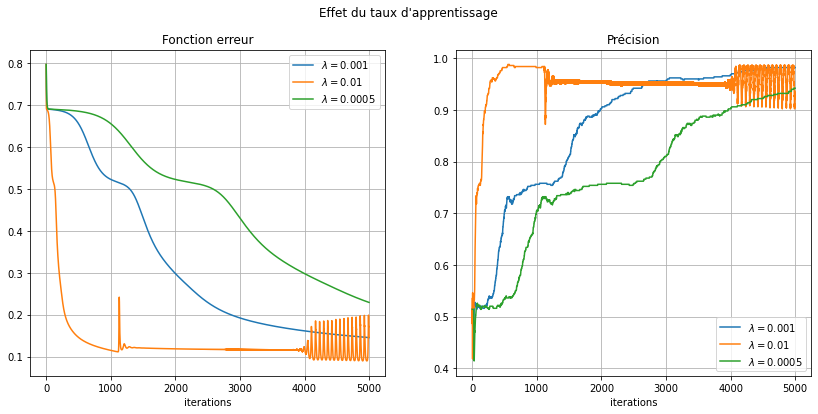

In [24]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Effet du taux d'apprentissage")

ax = fig.add_subplot(1, 2, 1)
for net in net1, net2, net3:
    ax.plot(net.losses, label=f"$\lambda = {net.learning_rate}$")
ax.grid(True)
ax.set(xlabel='iterations', title='Fonction erreur')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
for net in net1, net2, net3:
    ax.plot(net.accuracies, label=f"$\lambda = {net.learning_rate}$")
ax.grid(True)
ax.set(xlabel='iterations', title='Précision')
ax.legend();

### Effet de la fonction d'activation



In [25]:
pattern = Diamond()
sigmo_net = Network(pattern, Activation=Sigmoid, learning_rate=0.0005)
sigmo_net.train(n_iter=10000, verbose=False)
reLU_net = Network(pattern, Activation=ReLU, learning_rate=0.0005)
reLU_net.train(n_iter=10000, verbose=False)
tanh_net = Network(pattern, Activation=Tanh, learning_rate=0.0005)
tanh_net.train(n_iter=10000, verbose=False)

ite  9999, loss = 0.1453, accuracy = 0.982
ite  9999, loss = 0.2208, accuracy = 0.958
ite  9999, loss = 0.2438, accuracy = 0.89


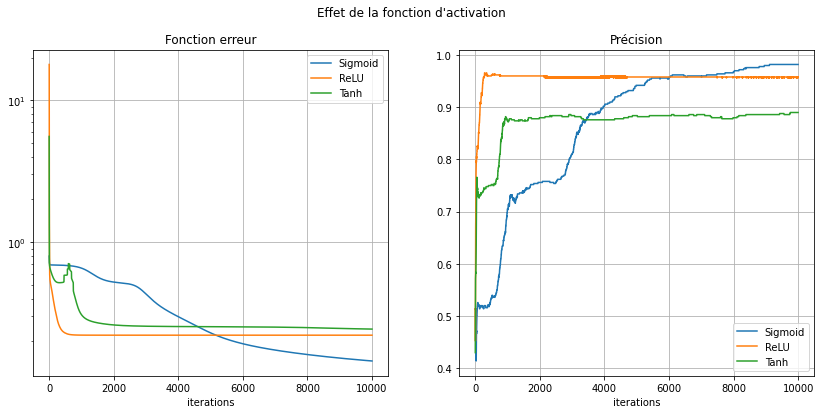

In [26]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Effet de la fonction d'activation")

networks = sigmo_net, reLU_net, tanh_net

ax = fig.add_subplot(1, 2, 1)
for net in networks:
    ax.semilogy(net.losses, label=net.g.__class__.__name__)
ax.grid(True)
ax.set(xlabel='iterations', title='Fonction erreur')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
for net in networks:
    ax.plot(net.accuracies, label=net.g.__class__.__name__)
ax.grid(True)
ax.set(xlabel='iterations', title='Précision')
ax.legend();

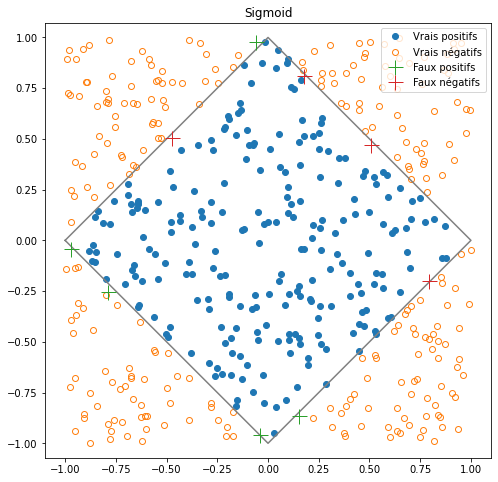

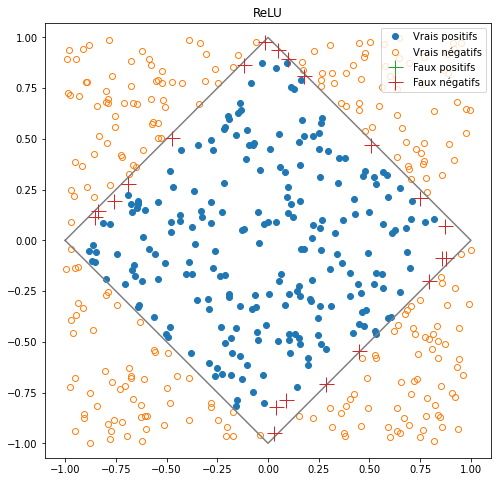

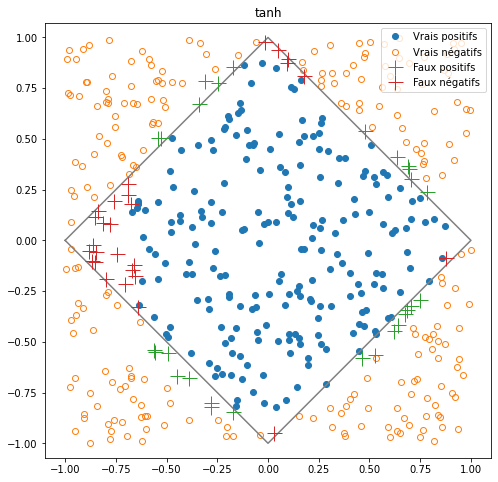

In [27]:
sigmo_net.plot_predictions("Sigmoid")
reLU_net.plot_predictions("ReLU")
tanh_net.plot_predictions("tanh")

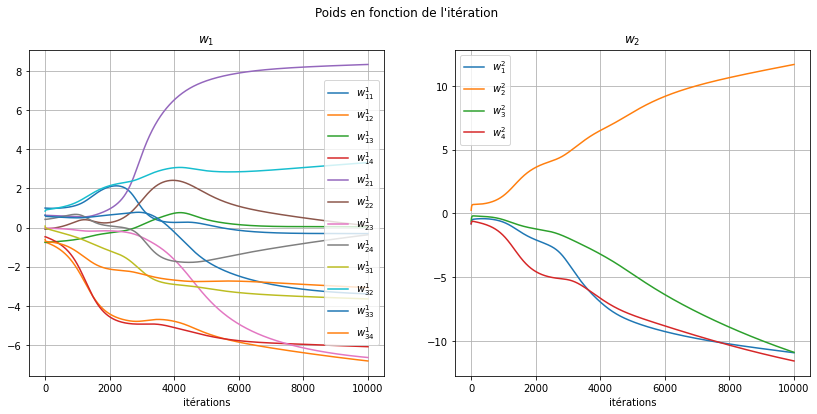

In [28]:
sigmo_net.plot_weights()

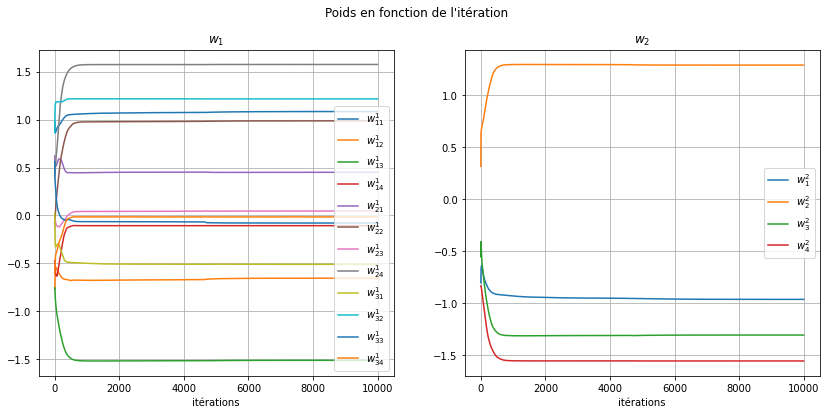

In [29]:
reLU_net.plot_weights()

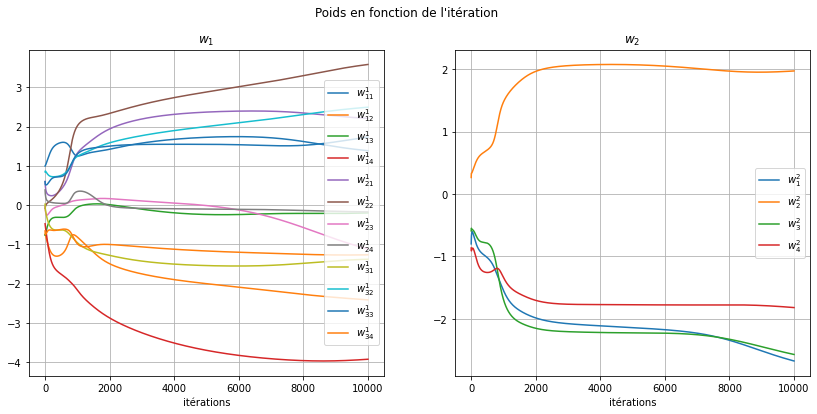

In [30]:
tanh_net.plot_weights()

### Effet de l'initialisation des poids

Toutes choses égales par ailleurs, on change la graine du générateur de nombre aléatoire.

ite  4999, loss = 0.2077, accuracy = 0.977


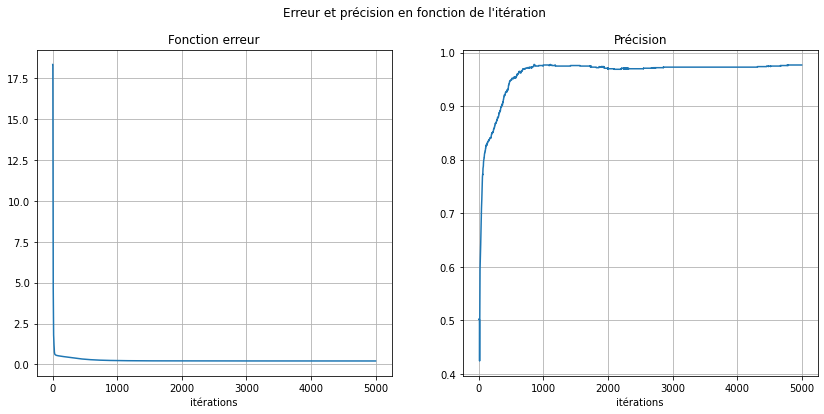

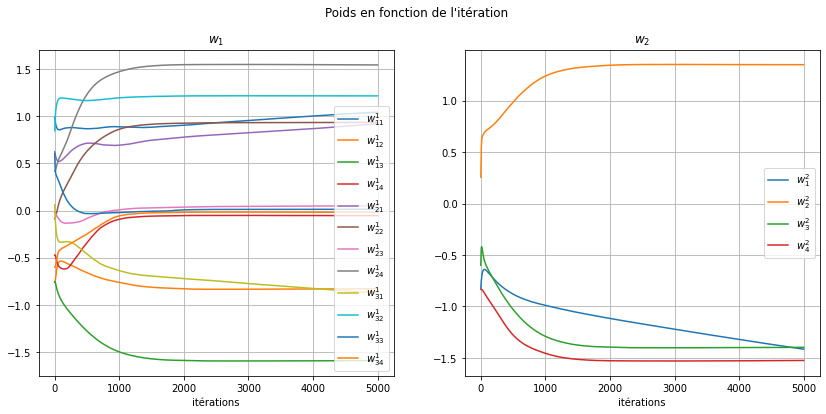

In [31]:
pattern = Diamond(n_obs=1000)

reLU_net1 = Network(pattern, Activation=ReLU, learning_rate=0.0001, seed=1241)
reLU_net1.train(verbose=False)
reLU_net1.plot_loss_accuracy()
reLU_net1.plot_weights()

ite  4999, loss = 0.2195, accuracy = 0.968


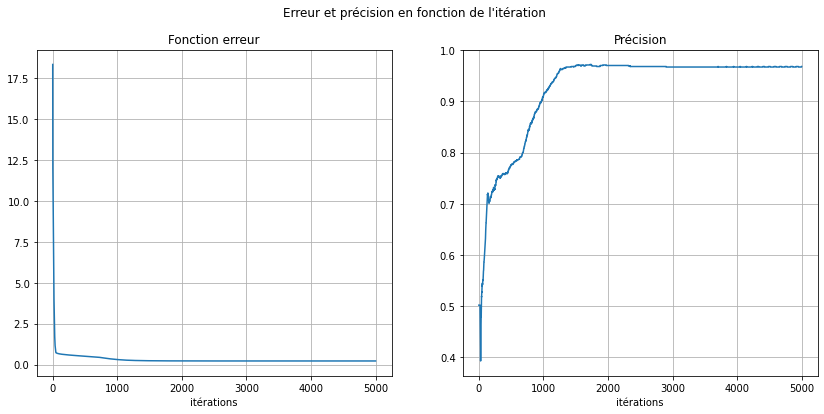

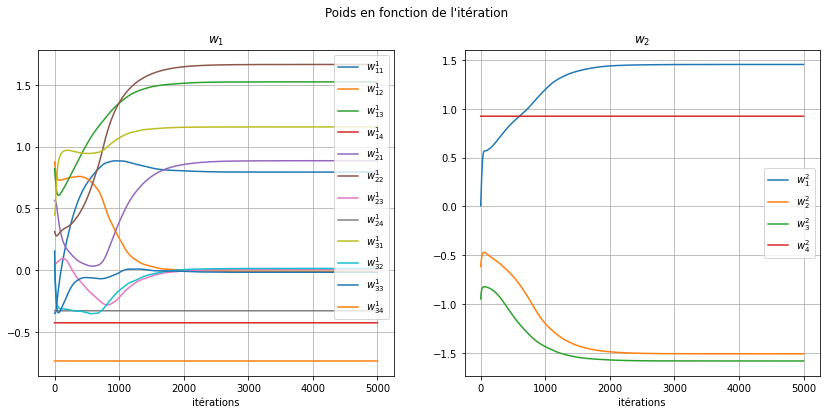

In [32]:
reLU_net2 = Network(pattern, Activation=ReLU, learning_rate=0.0001, seed=4242)
reLU_net2.train(verbose=False)
reLU_net2.plot_loss_accuracy()
reLU_net2.plot_weights()

### Représentation interactive

Observations :

- les précisions finales sont proches
- l'historique des poids est très différent
- les valeurs finales sont toutes différentes
- le cas 2 présente des poids constants sur les deux couches, ce qui correspond à des gradients nuls : probablement en raison de la zone de dérivée nulle de la fonction ReLU.

In [1]:
%matplotlib inline
import widget

Output()

## Conclusion

La méthode de rétropropagation du gradient est au coeur de l'apprentissage des réseaux de neurones à propagation avant.

Ce qu'on a vu :

- l'algorithme
- une mise en pratique simple mais qui illustre la sensibilité de l'apprentissage aux hyperparamètres.

Ce qu'on n'a pas vu :

- l'influence de la fonction coût
- les phénomènes de disparition/explosion du gradient
- les méthodes de mise à jour des poids *online* (pour chaque échantillons) vs *batch* (en moyennant les erreurs)
- les techniques de régularisation et d'inertie
- les questions de performance et l'utilisation des bibliothèques dédiées (PyTorch, Scikit-Learn, Tensorflow, etc.).

## Références bibliographiques

- Pages wikipedia [FR](https://fr.wikipedia.org/wiki/R%C3%A9tropropagation_du_gradient) et [EN](https://en.wikipedia.org/wiki/Backpropagation)
- Cours en ligne IBM, *Deep Learning and Reinforcement Learning* : https://www.coursera.org/learn/deep-learning-reinforcement-learning
- ML Glossary <https://ml-cheatsheet.readthedocs.io>
- Michael A. Nielsen, "Neural Networks and Deep Learning", Determination Press, 2015 <http://neuralnetworksanddeeplearning.com>
- Gabriel Peyré, *Course notes on Optimization for Machine Learning*, 2020